<a href="https://colab.research.google.com/github/JossefaRodriguez/Proyecto-2-_Parte-I/blob/main/EDA_dataset2_insurance_Medical_Cost_Personal_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [ ]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar el DataFrame.
path = "/content/drive/MyDrive/Colab Notebooks/DataScience BootCamp/Machine Learning/CORES/CORE6/insurance.csv"
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Este dataset contiene información sobre 1,338 personas aseguradas y está compuesto por 7 variables independientes (edad, sexo, índice de masa corporal, hijos, hábito de fumar, región, etc.) más 1 variable objetivo: charges, que representa el costo del seguro médico.

El objetivo del análisis es entender cómo estas características personales influyen en el precio del seguro

In [ ]:
# Se utiliza lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Análisis Exploratorio de Datos (EDA) Inicial

In [ ]:
# comenzaremos identificando posibles valores nulos
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# verificaremos valores duplicados dentro del dataset
df.duplicated().sum()

np.int64(1)

In [ ]:
# Se elimina el registro duplicado del DataFrame original dado que se encontro un registro
df = df.drop_duplicates()

# Se verifica que ya no haya duplicados
print("Registros después de eliminar duplicados:", len(df))

Registros después de eliminar duplicados: 1337


In [ ]:
# Se toma una muestra aleatoria del dataset para conocer el comportamiento de algunos datos
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
991,38,female,27.835,2,no,northeast,7144.86265
1271,25,female,34.485,0,no,northwest,3021.80915
233,59,male,27.500,1,no,southwest,12333.82800
253,27,male,30.300,3,no,southwest,4260.74400
1109,45,male,20.350,3,no,southeast,8605.36150
1194,31,female,21.755,0,no,northwest,4134.08245
723,19,male,35.400,0,no,southwest,1263.24900
183,44,female,26.410,0,no,northwest,7419.47790
955,31,male,39.490,1,no,southeast,3875.73410
714,24,female,22.600,0,no,southwest,2457.50200


In [ ]:
# La variable smoker aparece como object y es un bool por ende lo cambiaremos para futuros analisis con variables numericas.
df['smoker'].replace({'yes': 1, 'no': 0}, inplace=True)


/tmp/ipython-input-100-2471940292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace({'yes': 1, 'no': 0}, inplace=True)
/tmp/ipython-input-100-2471940292.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'].replace({'yes': 1, 'no': 0}, inplace=True)


In [ ]:
# se comprueba el cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 83.6+ KB


In [ ]:
# se realizará un analisis estadistico descrptivo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
smoker,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


#### Analisis

- respecto a la variable edad existe una distribucion simetrica, sin presencia de valores atipicos
- en cuanto al bmi o imc la media se encuentra en el limite entre sobrepeso y obesidad y pudiesen existen valores outliers
- en cuanto a la cantidad de hijos, el rango se encuentra entre 0 y 5 y gran parte tiene entre 0 y 2 hijos por lo que la distribución esta sesgada a valores bajos
- por ultimo el chargues o costo medico tiene una distribucion sesgada a la derecha con posibles valores fuera de rango que podria interpretarse en altos costos medicos por perfiles de alto riesgo o condiciones medicas.

In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,int64
region,object
charges,float64


In [ ]:
# Seleccionar solo columnas numericas
col_num = df.select_dtypes(include=['int64', 'float64'])

# Calcular Q1, Q3 e IQR para todas las columnas numericas
Q1 = col_num.quantile(0.25)
Q3 = col_num.quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers
outliers = (col_num < (Q1 - 1.5 * IQR)) | (col_num > (Q3 + 1.5 * IQR))

# Filtrar filas que tienen al menos un outlier en alguna columna
atipicos = col_num[outliers.any(axis=1)]

atipicos


,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
11,62,26.290,0,1,27808.72510
14,27,42.130,0,1,39611.75770
19,30,35.300,0,1,36837.46700
23,34,31.920,1,1,37701.87680
...,...,...,...,...,...
1314,30,23.655,3,1,18765.87545
1317,18,53.130,0,0,1163.46270
1321,62,26.695,0,1,28101.33305
1323,42,40.370,2,1,43896.37630


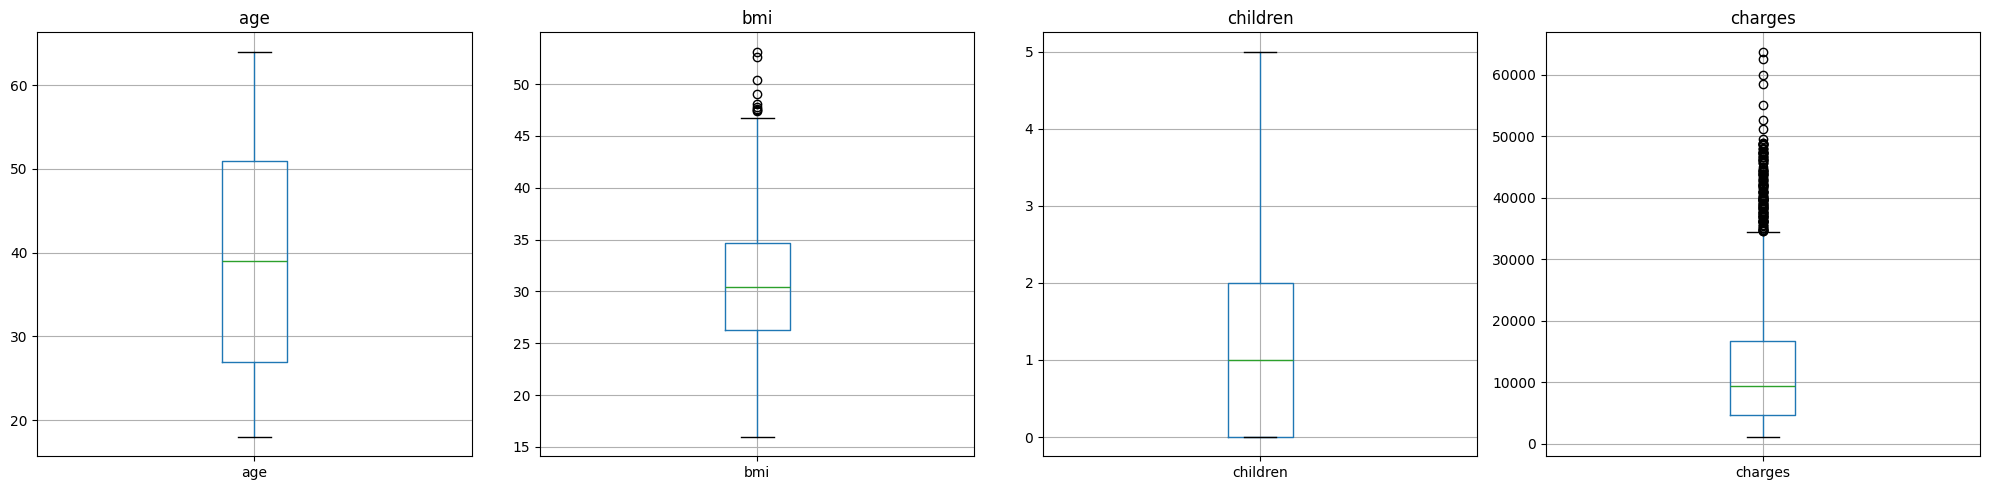

In [ ]:
# Para comprender mejor los valores atipicos, se generaran visualizaciones tipo boxplot para cada variable

# Filtrar variables numéricas excluyendo 'smoker'
col_num_filtradas = [col for col in col_num if col != 'smoker']
n_vars = len(col_num_filtradas)

# Calcular número de filas y columnas para la grilla
n_cols = 4
n_rows = math.ceil(n_vars / n_cols)

# Crear figura con grilla ajustada
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Graficar cada boxplot en su eje correspondiente
for i, col in enumerate(col_num_filtradas):
    df.boxplot(column=col, ax=axes[i], vert=True)
    axes[i].set_title(col)

# Eliminar subplots vacíos si sobran
for j in range(n_vars, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




####Analisis
- la variable edad no contiene valores atipicos, asi como tambien children
- En el caso de imc la distribucion esta centrada entre 25 y 35 aprox. Existen valores sobre el 45 -50 lo que nos indicaria personas con obesidad severa pero no son valores erroneos, ya que se pudiese dar el caso por ende se mantendran esos valores.
- En el caso de costo charges,la distribucion esta entre los 5000 y 15000 us sin embargo existe valores atipicos con costos sobre los 40000 lo que nos puede hacer suponer que los valores mas altos corresponden a personas con mayores factores de riesgo por ende tampoco serían valores erroneos, ya que existiria la posibilidad de su existencia.

Se realizará una matriz de correlacion para ver la correlacion que existe entre las variables del dataset

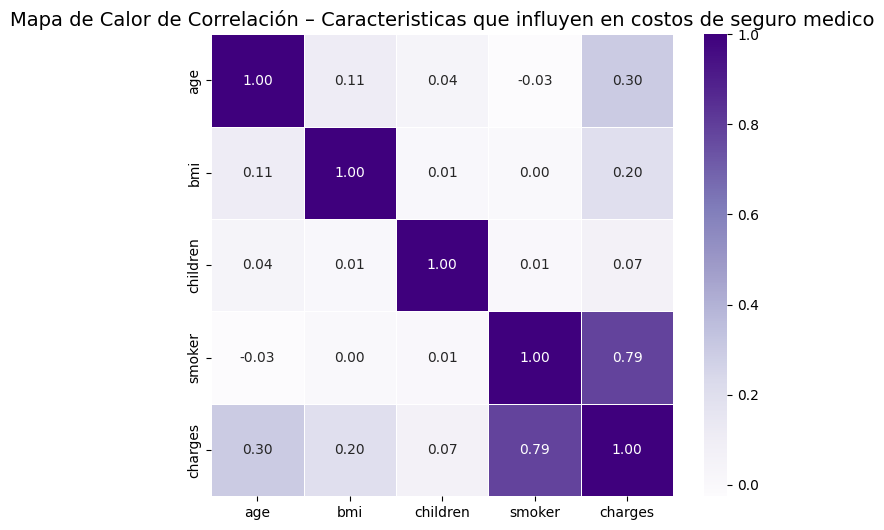

In [ ]:
# Se filtran las variables numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcula la matriz de correlación sólo con variables numéricas
matriz_correlacion = df_numerico.corr()

# Crea el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="Purples", square=True, linewidths=0.5)
plt.title("Mapa de Calor de Correlación – Caracteristicas que influyen en costos de seguro medico", fontsize=14)
plt.show()

####Analisis
- Segun lo observados, existe una fuerte correlacion entre la variable fumador y costo, lo que. nos confirma que la condicion de fumador influye fuertemente en el costo del seguro.
- La edad y el costo si bien tienen una correlacion esta es media, a myor edad mayor es el costo.
- En cuanto al imc influye pero debilmente com ouno pudiese imaginar.
- Y por ultimo la variale children y costo tiene una correlacion muy debil, por ende no afecta significativamente el costo del seguro.

## Diagnostico y Soluciónn del Problema

###Diagnostico

El dataset contiene información de asegurados, incluyendo edad, índice de masa corporal (BMI), número de hijos, hábito de fumar, sexo, región y el costo del seguro médico (charges).

La variable objetivo charges es numérica continua y representa el costo del seguro médico, influenciado por factores personales y de salud.

No hay valores nulos y exitia un valor duplicado que fue eliminado. Se detectaron outliers significativos en variables como bmi y charges, que ya fueron identificados y se mantuvieron ya que no son valores erroneos y esta la posibilidad de que existan.

Se observan correlaciones relevantes:

smoker tiene correlación positiva fuerte con charges (0.79): fumar incrementa  el costo.

age tiene correlación moderada positiva con charges: personas mayores tienden a pagar más

bmi tien correlación débil positiva con charges: el sobrepeso influye, pero no fuertemente

Variables como children, sex y region muestran baja correlación con el costo, pero podrían aportar valor en modelos no lineales o segmentados

###Selección del problema: Regresión
La variable objetivo es continua y permite estimar precios personalizados para nuevos clientes, identifica perfiles de riesgo o no.
Los desafios se encuentran en verificar nuevamente l apresencia de los valores atipicos si pueden influir o no en los futuros modelos predictivos, se podrían codificar algunas variables categoricas o mantenerlas sin perder su interpretabilidad.

